In [1]:
import pandas as pd
import numpy as np
games=pd.read_csv('data/vgsales.csv')
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
games['Year']=games['Year'].fillna(0)
games['Year']=games['Year'].astype(int)
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
games.isnull().head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [4]:
games.isnull().sum()*100/games.count()

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.000000
Genre           0.000000
Publisher       0.350665
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

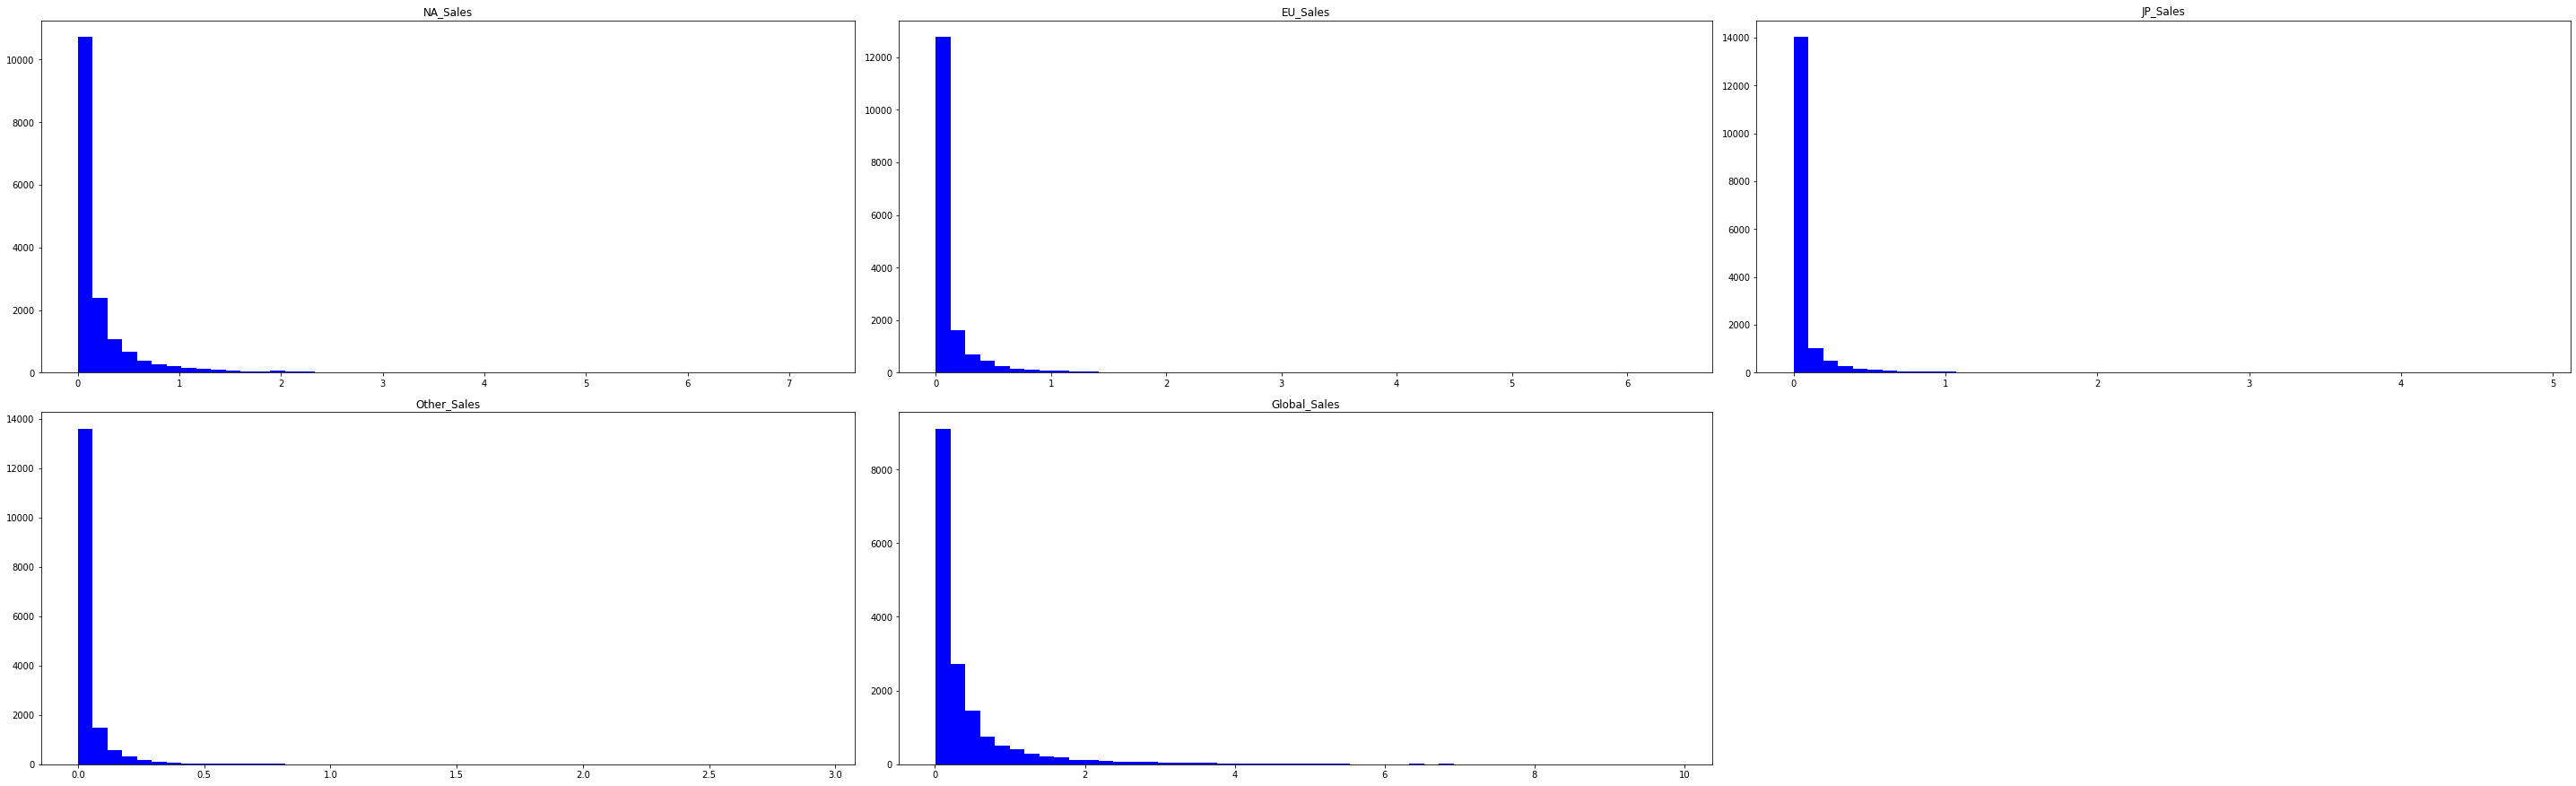

In [5]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(40,30))
y=len(games.columns)
games2=games[games["Global_Sales"]<10]
for i in range(6,y):
    plt.subplot(5,3,i-2)
    plt.hist(games2[games2.columns[i]],color = "blue",bins=50)
    plt.title(games2.columns[i])
plt.tight_layout()
plt.show()

In [49]:
from scipy.stats import zscore

z_scores = zscore(games["EU_Sales"])
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')


Eşik değeri: 1
Aykırı değerlerin sayısı: 780
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 364
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 214
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 128
------


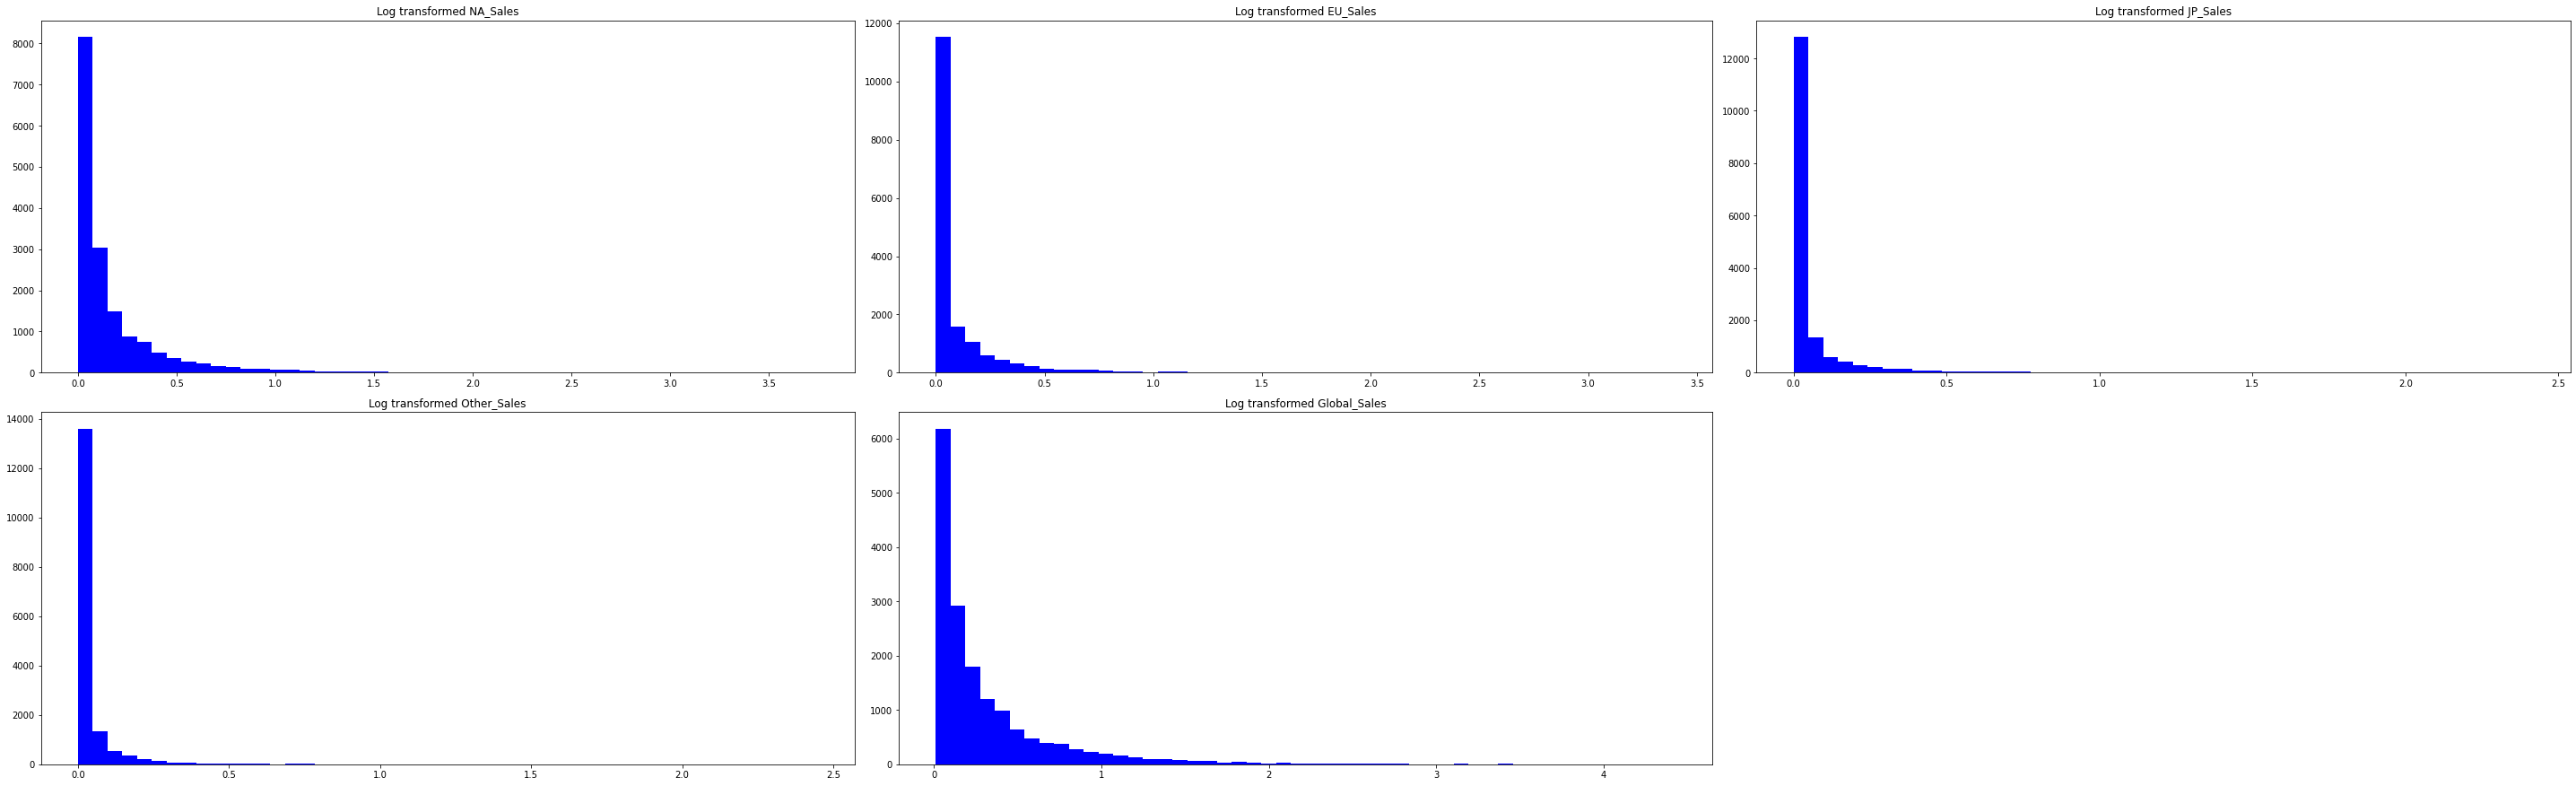

In [10]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(40,30))
y=len(games.columns)
games2=games[games["Global_Sales"]<10]
for i in range(6,y):
    plt.subplot(5,3,i-2)
    plt.hist(np.log(games[games.columns[i]]+1),color = "blue",bins=50)
    plt.title('Log transformed {}'.format(games.columns[i]))
plt.tight_layout()
plt.show()

In [14]:
from scipy.stats.mstats import winsorize

games["winsorize_NA_Sales"] = winsorize(games["NA_Sales"], (0, 0.10))
games["winsorize_EU_Sales"] = winsorize(games["EU_Sales"], (0, 0.10))
games["winsorize_JP_Sales"] = winsorize(games["JP_Sales"], (0, 0.10))
games["winsorize_Other_Sales"] = winsorize(games["Other_Sales"], (0, 0.10))
games["winsorize_Global_Sales"] = winsorize(games["Global_Sales"], (0, 0.10))

winsorize_variables=["winsorize_NA_Sales","winsorize_EU_Sales","winsorize_JP_Sales","winsorize_Other_Sales","winsorize_Global_Sales"]


plt.figure(figsize=(40,30))
y=len(winsorize_variables)
for i in range(6,y):
    plt.subplot(5,3,i-2)
    plt.hist(games[winsorize_variables[i]],color = "blue",bins=50)
    plt.title(winsorize_variables[i], fontdict=title_font)
plt.tight_layout()
plt.show()

<Figure size 2880x2160 with 0 Axes>

In [82]:
def categorized_sales(sale):
    good_sale=sum(games['Other_Sales'])*0.0070
    average_sale=sum(games['Other_Sales'])*0.0040
    if sale>=good_sale:
        return 1
    elif sale>=average_sale:
        return 2
    else:
        return 3
    

In [26]:
a=sum(games["NA_Sales"])*0.70
print('{0:.2f}'.format(a))

3075.07


In [83]:
#games['NA_SaleGroup']=games['NA_Sales'].apply(categorized_sales)
#games['EU_SaleGroup']=games['EU_Sales'].apply(categorized_sales)
#games['JP_SaleGroup']=games['JP_Sales'].apply(categorized_sales)
games['Other_SaleGroup']=games['Other_Sales'].apply(categorized_sales)
display(games.head())


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,winsorize_NA_Sales,winsorize_EU_Sales,winsorize_JP_Sales,winsorize_Other_Sales,winsorize_Global_Sales,NA_SaleGroup,EU_SaleGroup,JP_SaleGroup,Other_SaleGroup
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.61,0.35,0.18,0.11,1.21,1,1,3,1
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.61,0.35,0.18,0.11,1.21,2,3,2,3
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.61,0.35,0.18,0.11,1.21,3,2,3,2
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.61,0.35,0.18,0.11,1.21,3,2,3,3
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.61,0.35,0.18,0.11,1.21,3,3,1,3


In [84]:
games.to_csv('games_modified.csv')

In [73]:
games["NA_SaleGroup"].nunique()

1

In [43]:
good_sale=sum(games["NA_Sales"])*70/10000
good_sale

30.750650000002324